                                              Resume          Category
0  Python Developer Python Developer Philadelphia...  Python_Developer
1  Python Developer Python Developer Python Devel...  Python_Developer
2  R&D Engineer R&D Engineer R&D Engineer - Nokia...  Python_Developer
3  Sr. Full Stack Developer Sr. Full Stack Develo...  Python_Developer
4  Sr. Full Stack Python Developer Sr. Full Stack...  Python_Developer
Category
Python_Developer          1278
Java_Developer            1242
Web_Developer              984
Database_Administrator     920
Security_Analyst           876
Systems_Administrator      776
Project_manager            722
Front_End_Developer        530
Network_Administrator      469
Software_Developer         437
Name: count, dtype: int64


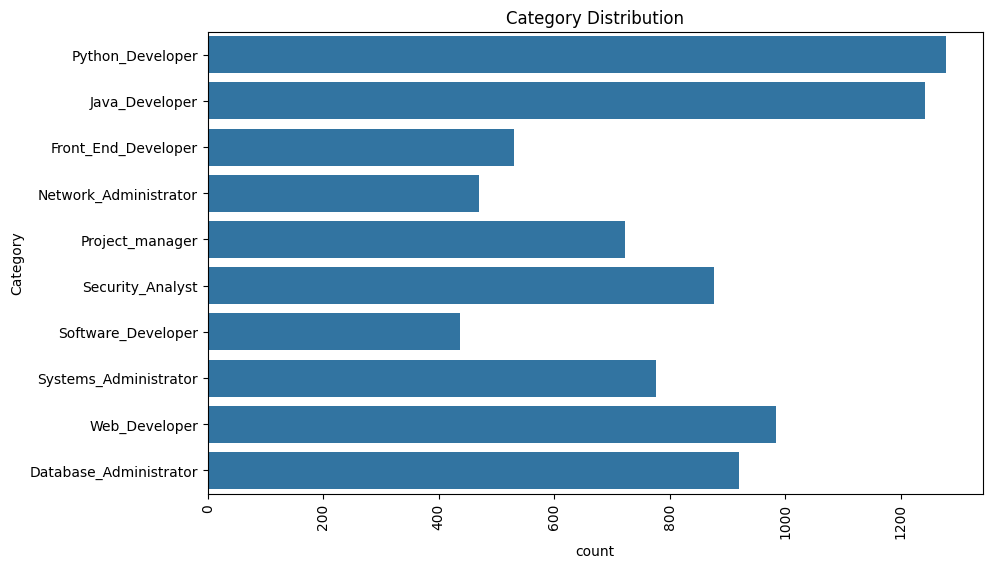

Accuracy:  0.7261687917425622

Classification Report:
                         precision    recall  f1-score   support

Database_Administrator       0.98      0.72      0.83       200
   Front_End_Developer       0.00      0.00      0.00       117
        Java_Developer       0.65      0.98      0.78       249
 Network_Administrator       1.00      0.04      0.07        85
       Project_manager       0.84      0.87      0.85       135
      Python_Developer       0.81      0.98      0.89       262
      Security_Analyst       0.95      0.90      0.93       181
    Software_Developer       0.00      0.00      0.00        87
 Systems_Administrator       0.58      0.95      0.72       142
         Web_Developer       0.50      0.69      0.58       189

              accuracy                           0.73      1647
             macro avg       0.63      0.61      0.57      1647
          weighted avg       0.68      0.73      0.67      1647



C:\Users\Satyam Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Satyam Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Satyam Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

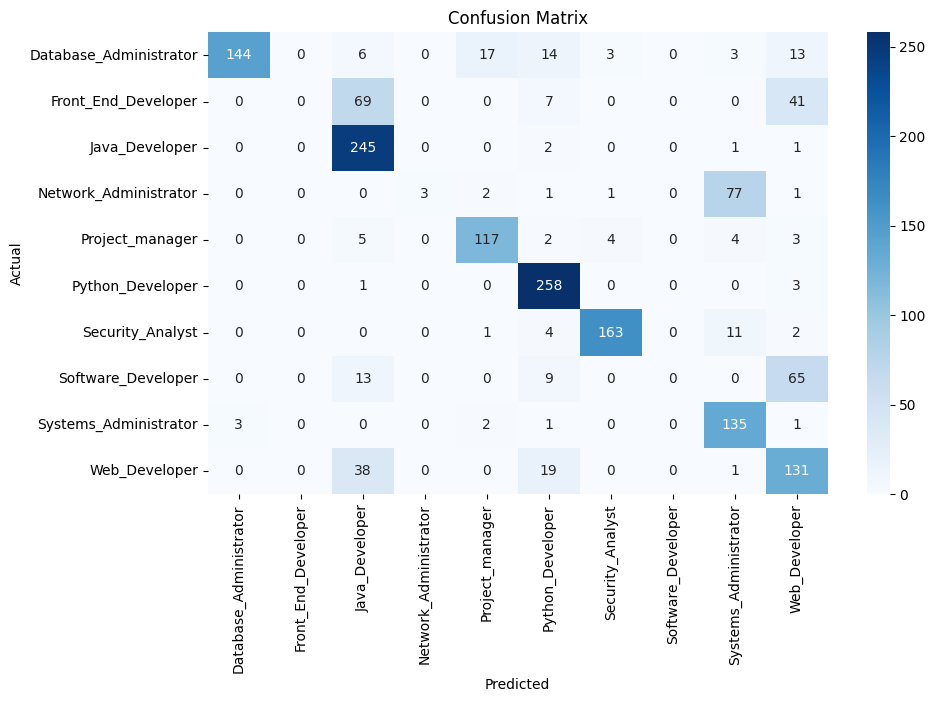

['resume_screening_model.pkl']

In [5]:
# Resume Screening and Classification

## Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('final_merged_dataset2.csv')

# Preview the dataset
print(data.head())

# Checking the distribution of categories
print(data['Category'].value_counts())

# Visualizing the category distribution
plt.figure(figsize=(10,6))
sns.countplot(data['Category'])
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

# Text pre-processing and TF-IDF vectorization
# We will use TfidfVectorizer to convert resume text into numerical form
X = data['Resume']
y = data['Category']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with TfidfVectorizer and Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Predictions on test data
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix to visualize misclassifications
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Saving the model for later use
import joblib
joblib.dump(model, 'resume_screening_model.pkl')

# To load the model for predictions
# loaded_model = joblib.load('resume_screening_model.pkl')
# new_predictions = loaded_model.predict(new_resume_text)
